# Colored Noise

<div class="alert alert-success">
This notebook will discuss colored noise in the time and frequency domain.
</div>

In [1]:
from utils.noise import *

General noise is a signal that is largely formed through a [stochasitc process](https://en.wikipedia.org/wiki/Stochastic). When we talk about colored noise we usually refer to an additional underlying pattern that is evident in the signal eventhough there is some amount of randomness involved.
Some types of colored noise follow the general form of $$\frac{1}{f^{\beta}}$$ where β determines the 'color' and properties of the noise. These are the types of noise we will be discussing in this notebook which we will call 'power law noises'.

### White Noise - Time Domain

White noise is an example of a power law noise where β = 0. Below is a time series of white noise. This noise is generated by sampling from a standard normal distribution and as a result we see the y values mirror the domain of a standard normal distribution - there are many samples close to 0 and fewer samples further away from 0. White noise can also be generated from other distributions such as unifom and poisson distributions which affect the range of the samples.

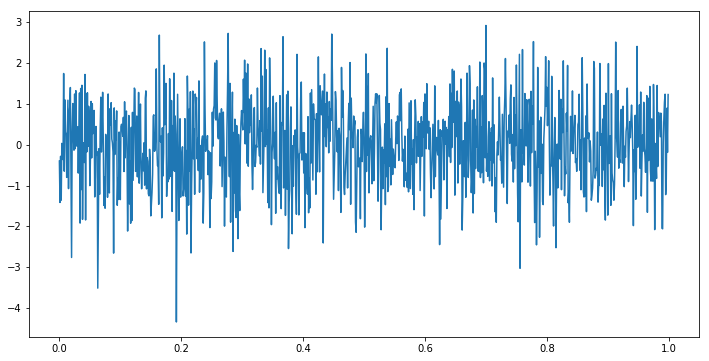

In [27]:
# define number of samples in serie
num_samples = 1000000

# Generate white noise time series 
mean = 0
std = 1  

# sampling rate 1000Hz
fs_white = 1000 

# generate white (random) noise
white_data = np.random.normal(mean, std, size=num_samples) 

# time scale = number of samples / sampling rate
time_scale = np.arange(len(white_noise_data))/fs_white 

noise_time_plot(white_data, time_scale)

### White Noise - Frequency Domain

If we compute a fourier transfrom on our white noise time series we will arrive at the frequency domain of our signal. Notice the property that the frequency spectrum is flat - this is where the Power law relationship of 1/f^0 comes from. The total power in any two frequency bands of equal width is the same. For example, the total power from [20, 50] Hz is the same as the total power in [350, 380] Hz because the bandwidths are both the same. For those interested, here's [why.](https://en.wikipedia.org/wiki/Law_of_large_numbers)

C:\Users\julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


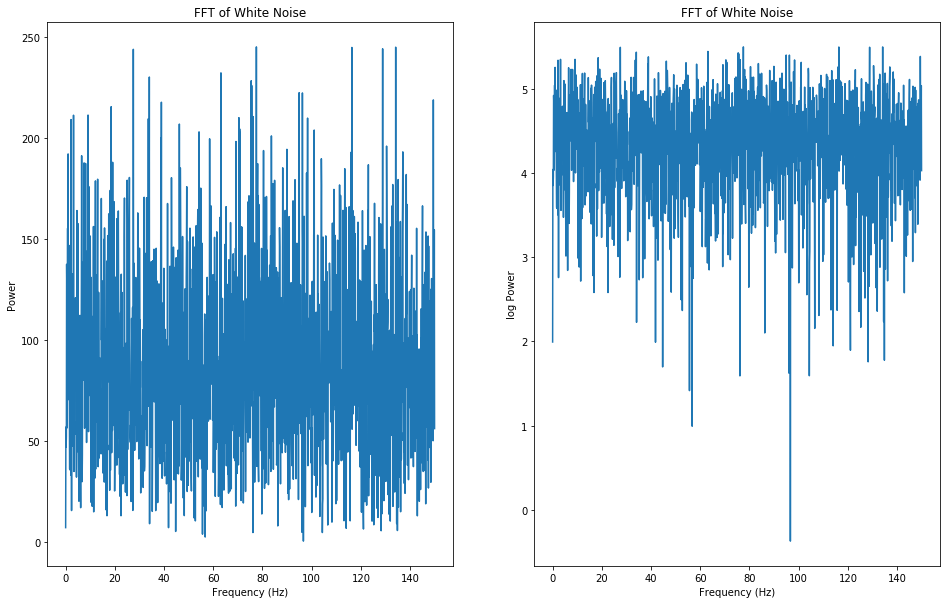

In [28]:
# calculating fourier transform of signal
white_fourier = np.fft.fft(white_noise_data[0:10000])

# finding frequency values for the x axis
fx_step_size = fs_white / len(white_noise_data[0:10000])
nyq = .5 * fs_white
total_steps = nyq / fx_step_size
fx_bins = np.linspace(0, nyq, total_steps)

noise_frequency_plot(white_fourier, fx_bins, "FFT of White Noise")

Below is a welch plot which estimates the power at every frequency. Notice that the trend is a line parallel to the x-axis. This is a result of β = 0.

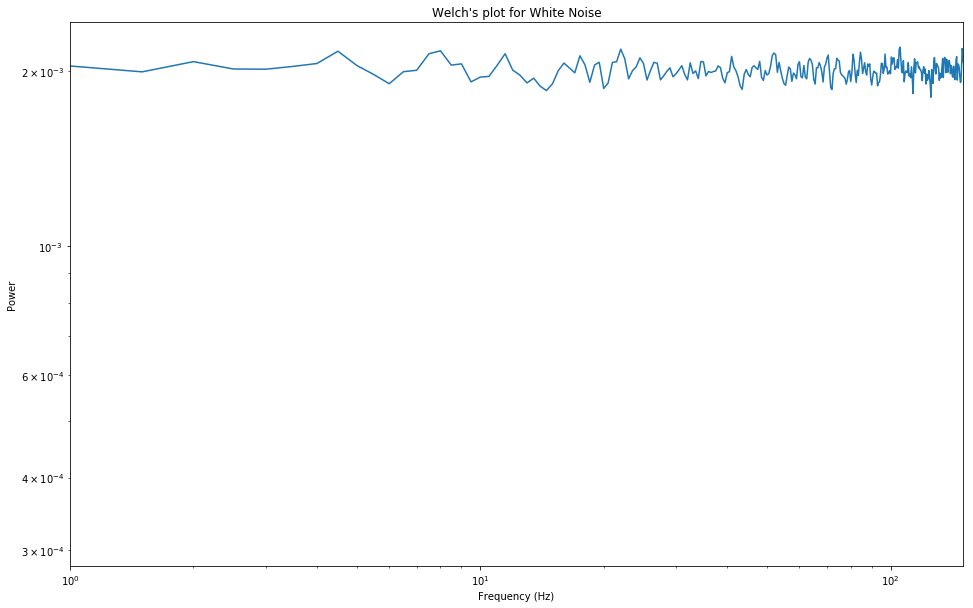

In [30]:
fs_white, ps_white = sp.signal.welch(white_noise_data, fs=fs_white, window='hanning', nperseg=2*fs_white, noverlap=fs_white/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

welch_plot(fs_white, ps_white,"Welch's plot for White Noise")

### Pink Noise - Time Domain

Pink noise is our next power law noise which has a β value of β = 1. The time series seems more sporadic than the white noise time series but the pink noise PSD has some interesting features. This is the first noise whose power spectrum resembles a signal found in the brain. The following is an algorithm created by Voss and McCarthy to generate pink noise. 

Voss, R. F., & Clarke, J. (1978). "1/f noise" in music: Music from 1/f noise". Journal of the Acoustical Society of America 63: 258–263.

In [6]:
#Function to generate time series with properties of pink noise
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.

    nrows: number of values to generate
    rcols: number of random sources to add

    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

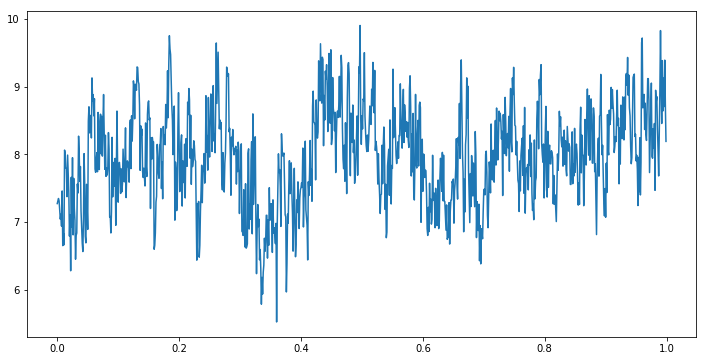

In [31]:
pink_data = voss(1000000)
fs_pink = 1000
time_scale = np.arange(len(pink_data)) / fs_pink
noise_time_plot(pink_data, time_scale)

### Pink Noise - Frequency Domain

C:\Users\julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


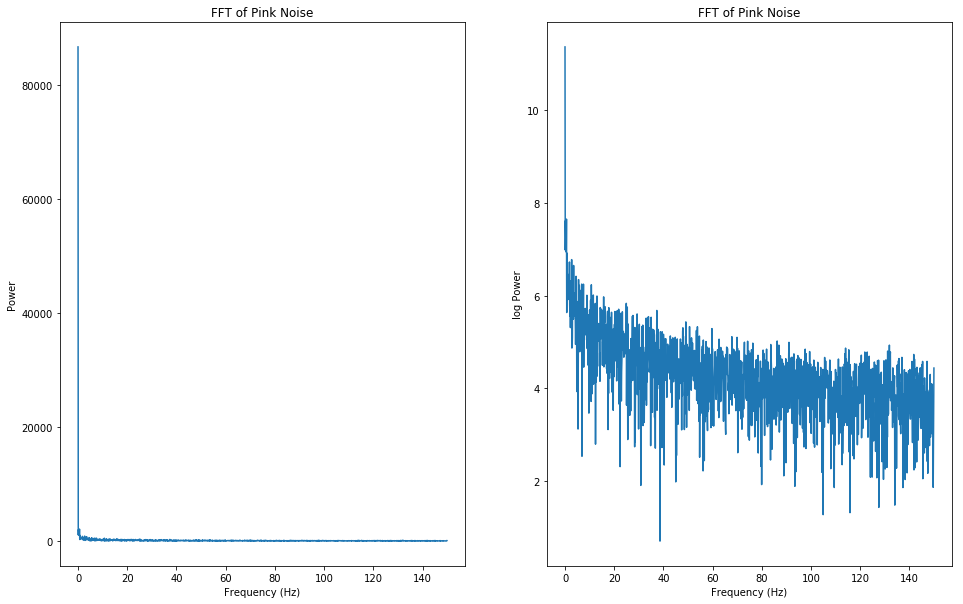

In [33]:
pink_fourier = np.fft.fft(pink_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs_pink / len(pink_data[0:10000])
nyq = .5 * fs_pink
total_steps = nyq / fx_step_size
fx_bins = np.linspace(0, nyq, total_steps)

noise_frequency_plot(pink_fourier, fx_bins, 'FFT of Pink Noise')

Notice that in linear space plot (up on left) plots the data in a hard-to-digest way. As a result, pink noise is often shown in semi-log space. The y-axis is scaled such that each subsequent value is 10x larger than the previous. It turns out that this distribution $\frac{1}{f^{1}}$ mysteriously shows up quite a lot in the [universe.](https://www.youtube.com/watch?v=fCn8zs912OE)

Below is the distriution of power in each frequency. Notice that there is a downward slope which is a result of β = 1. This figure is in log-log space which means that both axes have a logrithmic scaling.

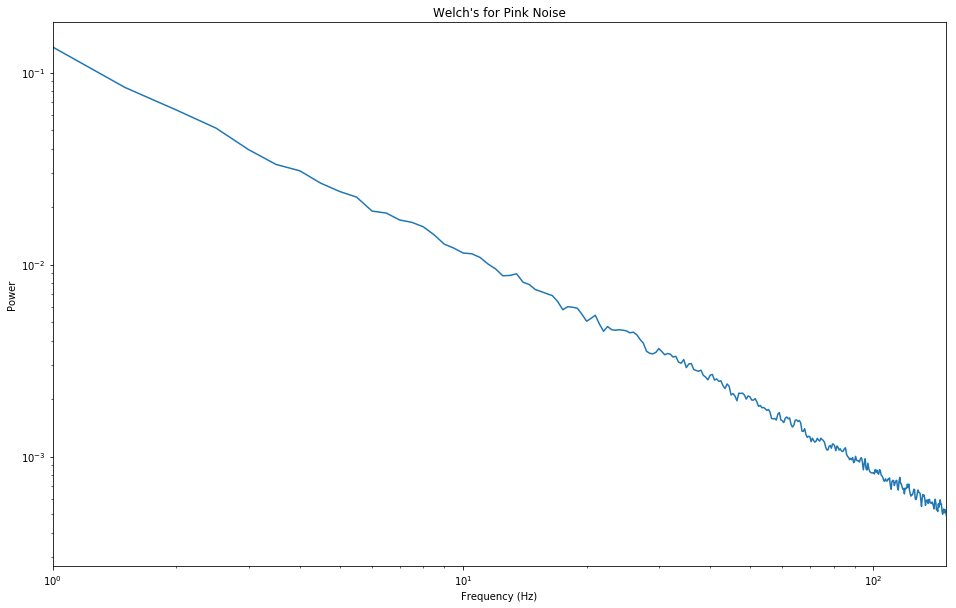

In [35]:
fs_pink, ps_pink = sp.signal.welch(pink_data, fs=fs_pink, window='hanning', nperseg=2*fs_pink, noverlap=fs_pink/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

welch_plot(fs_pink, ps_pink, "Welch's for Pink Noise")

### Brown Noise - Time Domain

The last colored noise we will go over is Brown noise in which β = 2. Brown noise, also known as red noise, looks similar to pink noise in both the time domain and frequency domain but with some exaggerated features. Below is the time series of a brown noise signal.

In [36]:
#Function to generate time series with properties of brown noise
def brown(N, state=None):

    state = np.random.RandomState() if state is None else state
    uneven = N % 2
    X = state.randn(N // 2 + 1 + uneven) + 1j * state.randn(N // 2 + 1 + uneven)
    S = (np.arange(len(X)) + 1)# Filter
    y = (irfft(X / S)).real
    if uneven:
        y = y[:-1]
    return normalize(y,1)[0]

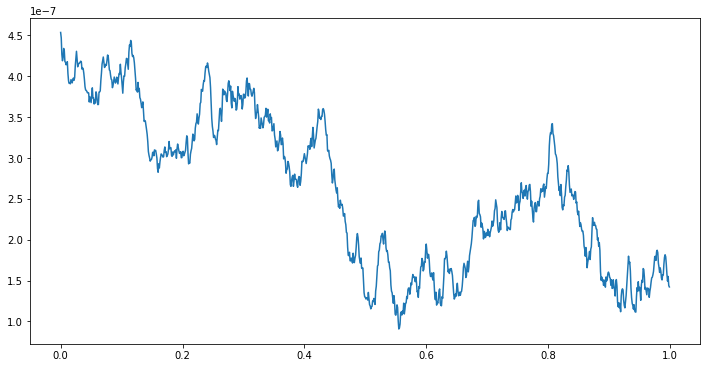

In [37]:
# get brown noise data as time series
brown_data = brown(1000000)
fs_brown = 1000
time_scale = np.arange(len(brown_data)) / fs_brown

noise_time_plot(brown_data, time_scale)

### Brown Noise - Frequency Domain

C:\Users\julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


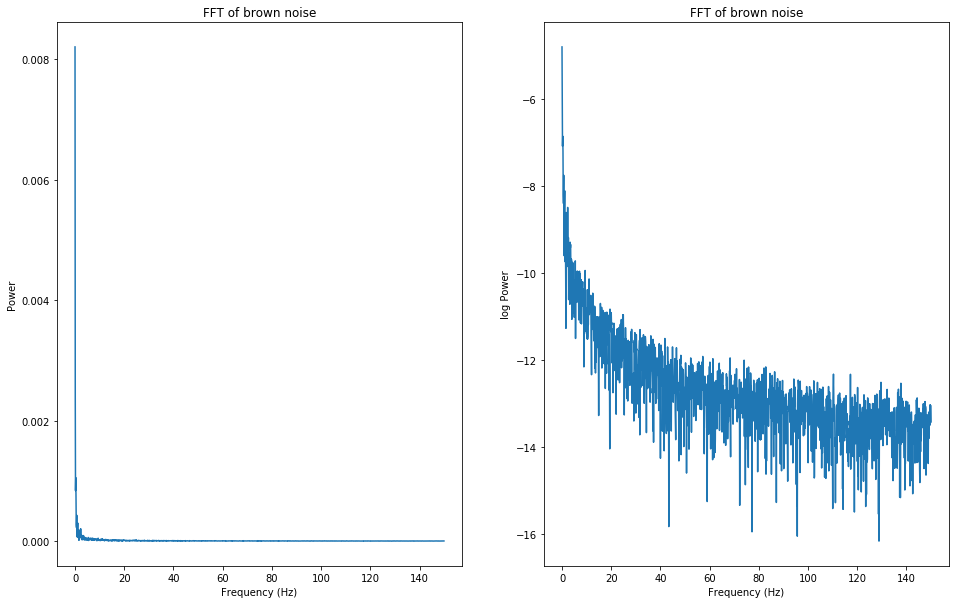

In [38]:
brown_fourier = np.fft.fft(brown_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs_brown/len(brown_data[0:10000])
nyq = .5*fs_brown
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

noise_frequency_plot(brown_fourier, fx_bins, "FFT of brown noise")

Notice that in linear space the power spectrum is slightly harder to digest than the pink noise counterpart. Also note that the decrease of the power spectrum is slightly more exaggerated than that of pink noise. These patterns will be more exaggerated as β takes on larger values.

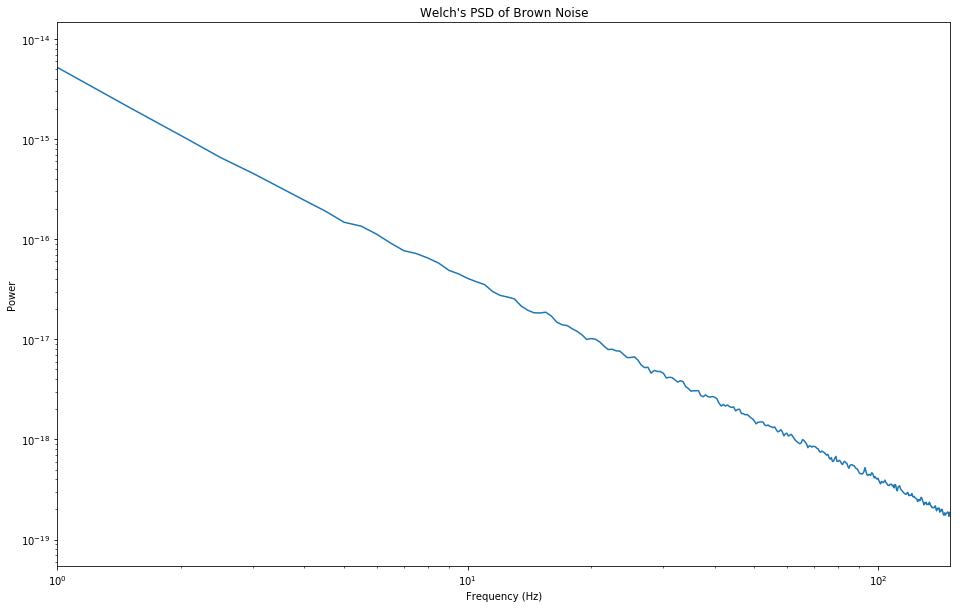

In [39]:
fs_brown, ps_brown = sp.signal.welch(brown_data, fs=fs_brown, window='hanning', nperseg=2*fs_brown, noverlap=fs_brown/2, nfft=None, detrend='linear', return_onesided=True, scaling='density')

welch_plot(fs_brown, ps_brown, "Welch's PSD of Brown Noise")

Compare this distribution to that of pink noise. Notice the scaling to see how the β value affects slope in this log-log plot.